In [106]:
%matplotlib inline

In [179]:
from __future__ import print_function
print(__doc__)

import pandas as pd
import numpy as np
import sys
from pandas import DataFrame

import matplotlib.pyplot as plt
from datetime import datetime, timedelta


from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import datasets, linear_model
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.datasets.california_housing import fetch_california_housing



Automatically created module for IPython interactive environment


In [180]:
data = pd.read_csv('train.csv')
data.keys()

data['datetime'] = pd.to_datetime(data['datetime'])
data['year'], data['month'] = data['datetime'].dt.year, data['datetime'].dt.month

#data['new_test'] = pd.to_numeric(data['datetime'].map(str)
data['new_date'] = (data['year'].map(str) + '.'+ data['month'].map(str)).map(float)

print(data)

          ID            datetime  temperature  var1  pressure  windspeed var2  \
0          0 2013-07-01 00:00:00        -11.4 -17.1    1003.0    571.910    A   
1          1 2013-07-01 01:00:00        -12.1 -19.3     996.0    575.040    A   
2          2 2013-07-01 02:00:00        -12.9 -20.0    1000.0    578.435    A   
3          3 2013-07-01 03:00:00        -11.4 -17.1     995.0    582.580    A   
4          4 2013-07-01 04:00:00        -11.4 -19.3    1005.0    586.600    A   
5          5 2013-07-01 05:00:00        -10.7 -19.3    1013.0      2.790    A   
6          6 2013-07-01 06:00:00        -13.6 -17.1    1006.0      4.380    A   
7          7 2013-07-01 07:00:00        -11.4 -17.9     997.0      7.635    A   
8          8 2013-07-01 08:00:00        -10.7 -18.6    1012.0     12.055    A   
9          9 2013-07-01 09:00:00        -10.0 -16.4    1002.0     17.975    A   
10        10 2013-07-01 10:00:00         -7.1 -17.1    1008.0     23.035    A   
11        11 2013-07-01 11:0

In [181]:
# Dividir nossos dados

#datetime = pd.to_datetime(data['datetime'])
#datetime.dt.strftime('%Y.%m')

# print(datetime)

# datetime.replace('.0','.')

# print(datetime)
Y = data['electricity_consumption']

ec_data = ['new_date','temperature', 'pressure', 'windspeed']
X = data[ec_data]


# X = data['new_date_column']
# df = data

# df.datetime = pd.to_datetime(df.datetime, format='%b %d- %Y', errors='coerce')
# print (df)

# print(X)
# print(Y)
train, test, train_labels, test_labels = train_test_split(X,
                                                          Y,
                                                          test_size=0.2,
                                                          random_state=0)

print(train)
print('--------')
print(train_labels)


#print(train['datetime'][:5])
#print(feature_names[1:],'\n')
#print(train_labels)
print(train.shape)
print(test.shape)

       new_date  temperature  pressure  windspeed
10762   2015.20         12.9     979.0      4.455
14316   2015.80         -5.0     995.0      4.705
14842   2015.90         -0.7     971.0    101.770
3311    2013.12         12.1     987.0      7.135
6924    2014.70          0.0     999.0     48.640
21888   2016.10          5.0     979.0     20.540
3291    2013.12          8.6     982.0     12.380
12505   2015.50         -6.4    1006.0      1.765
16540   2015.12         10.7     969.0      1.765
25215   2017.40         13.6     976.0      7.010
23407   2017.10         15.0     966.0      4.645
17314   2016.20         15.0     974.0      3.040
4410    2014.20         13.6     991.0     37.510
8991    2014.11         16.4     988.0     24.625
9983    2015.10         15.0     973.0     41.530
11915   2015.40          5.0     982.0     55.025
7274    2014.80         -8.6     990.0      3.415
4664    2014.30          6.4     987.0      4.330
15943   2015.11          9.3     989.0      5.455


Text(0,0.5,'Temperature')

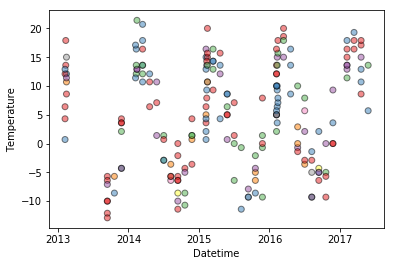

In [182]:
#Plota 
plt.scatter(train['new_date'][:200], train['temperature'][:200], c=train_labels[:200],
            cmap=plt.cm.Set1, edgecolor='k',alpha=0.5)
plt.xlabel('Datetime')
plt.ylabel('Temperature')

#plt.xticks(my_xticks[:10])

#plt.grid(axis='y', linestyle='-')
#plt.show()



In [183]:
# # create the plot space upon which to plot the data
# fig, ax= plt.subplots(figsize = (25,25))

# # add the x-axis and the y-axis to the plot
# ax.plot(train['new_date'], 
#         train['temperature'], 
#         color = 'red')

# # rotate tick labels
# plt.setp(ax.get_xticklabels(), rotation=45)

# # set title and labels for axes
# ax.set(xlabel="Date",
#        ylabel="Temperature",
#        title="Grafico 1");

In [184]:
print("Training GBRT...")
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train, train_labels)

# Make predictions using the testing set
train_labels = regr.predict(train)


print(" done.")

Training GBRT...
 done.


In [185]:
# The coefficients
print('Coefficients: \n', regr.coef_)


Coefficients: 
 [-0.96496272 -3.28124987 -1.27398689 -0.56886572]
